### Student Information
Name:王紀堯

Student ID:112065516

GitHub ID:JiyaoWang14

Kaggle name:Jayden_den_den_den

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [17]:
### Begin Assignment Here
###Some preparation
import pandas as pd
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import numpy as np
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger
from sklearn.metrics import accuracy_score
import gensim
import warnings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api
import ssl
import urllib.request
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
ssl._create_default_https_context = ssl._create_unverified_context

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)


anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

X_train_hw = BOW_500.transform(train_df['text'])
y_train_hw = train_df['emotion']

X_test_hw = BOW_500.transform(test_df['text'])
y_test_hw = test_df['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y_train_hw)

y_train_hw = label_encode(label_encoder, y_train_hw)
y_test_hw = label_encode(label_encoder, y_test_hw)

input_shape = X_train_hw.shape[1]
output_shape = len(label_encoder.classes_)

model_input = Input(shape=(input_shape, ))  # 500
X = model_input

X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

model = Model(inputs=[model_input], outputs=[model_output])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
csv_logger = CSVLogger('logs/training_log.csv')
epochs = 25
batch_size = 32
history = model.fit(X_train_hw, y_train_hw, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test_hw, y_test_hw))
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

model_path = "./GoogleNews-vectors-negative300.bin.gz" #github can not upload the file larger than 25mb, as a result, TA may change the path that link to the model in TA's computer
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Epoch 1/25
113/113 [==============================] - 2s 4ms/step - loss: 1.3253 - accuracy: 0.3684 - val_loss: 1.2639 - val_accuracy: 0.4553
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9665 - accuracy: 0.6496 - val_loss: 0.8920 - val_accuracy: 0.6571
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.7949 - val_loss: 0.7868 - val_accuracy: 0.6916
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8511 - val_loss: 0.7921 - val_accuracy: 0.6888
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8824 - val_loss: 0.8562 - val_accuracy: 0.6801
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.9106 - val_loss: 0.9308 - val_accuracy: 0.6599
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9275 - val_loss: 0.9518 - val_accuracy: 0.6801
Epoch 

Exercise 1

<Axes: title={'center': 'Test_data_top_30'}>

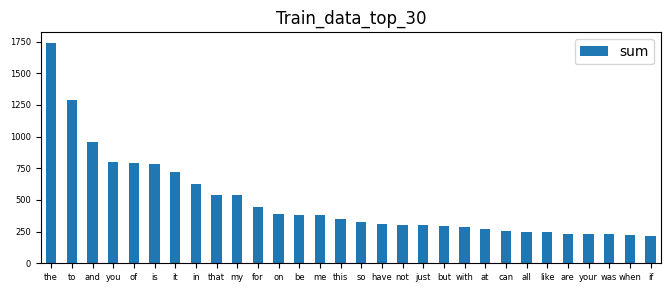

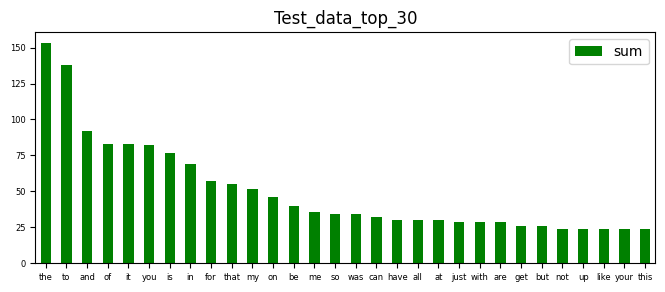

In [18]:
count_vect1 = CountVectorizer() #creat countvectorizer
count_vect2 = CountVectorizer()
train_count = count_vect1.fit_transform(train_df.text) #fit and transform
test_count = count_vect2.fit_transform(test_df.text)

plot_x1 = [str(i) for i in count_vect1.get_feature_names_out()] #set the x and y
plot_y1 = [str(i) for i in list(train_df.index)]
plot_z1 = train_count.toarray() #get a array to prepare to produce a dataframe

plot_x2 = [str(i) for i in count_vect2.get_feature_names_out()] #as above
plot_y2 = [str(i) for i in list(test_df.index)]
plot_z2 = test_count.toarray()

df_train = pd.DataFrame(plot_z1, columns = plot_x1, index = plot_y1) #creat dataframe
df_test = pd.DataFrame(plot_z2, columns = plot_x2, index = plot_y2)

df_train_sum = pd.DataFrame(columns=plot_x1,index=['sum']) #caculate the sum
for i in plot_x1:
    df_train_sum.iloc[0][i] = df_train[i].sum()
df_test_sum = pd.DataFrame(columns=plot_x2,index=['sum']) #as above
for i in plot_x2:
    df_test_sum.iloc[0][i] = df_test[i].sum()

df_train_sorted = df_train_sum.sort_values(by='sum',ascending=False,axis=1) #sort it
df_test_sorted = df_test_sum.sort_values(by='sum',ascending=False,axis=1)

df_train_top30_label = df_train_sorted.columns[:30] #choose top 30
df_test_top30_label = df_test_sorted.columns[:30]
df_train_top30 = df_train_sorted[df_train_top30_label]
df_test_top30 = df_test_sorted[df_test_top30_label]

df_train_top30.T.plot(kind = 'bar',title = 'Train_data_top_30',rot = 0, fontsize = 6, figsize = (8,3)) #draw the chart
df_test_top30.T.plot(kind = 'bar',title = 'Test_data_top_30',rot = 0, fontsize = 6, figsize = (8,3),color='green')

Exercise 2

In [19]:
tfidf_vec = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize,smooth_idf=False) #use tf-idf vectorizer
tfidf_vec.fit(train_df['text'])
tfidf_name1000 = tfidf_vec.get_feature_names_out()
tfidf_name1000[100:110]

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

Exercise 3

In [20]:
"""
1."joy" Dad can be predicted most accurately.
2.If the text is predicted incorrectly, it is most likely to be classified as the fear.
3.The anger text will be dispredicted as the fear text the most.
4.If the text is anger, it is seldom predicted as the sadness.
"""

'\n1."joy" Dad can be predicted most accurately.\n2.If the text is predicted incorrectly, it is most likely to be classified as the fear.\n3.The anger text will be dispredicted as the fear text the most.\n4.If the text is anger, it is seldom predicted as the sadness.\n'

Exercise 4

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



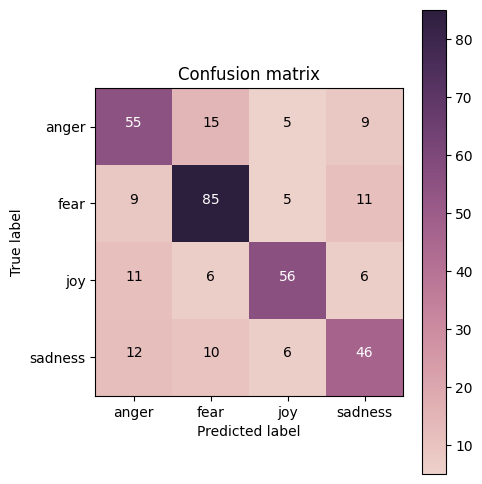

In [21]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
NB_classfier = MultinomialNB(force_alpha=True)
X_train1 = BOW_500.transform(train_df['text'])
y_train1 = train_df['emotion']

X_test1 = BOW_500.transform(test_df['text'])
y_test1 = test_df['emotion']

NB_classfier.fit(X_train1,y_train1)
NB_pre_train = NB_classfier.predict(X_train1)
NB_pre_test = NB_classfier.predict(X_test1)

print(classification_report(y_true=y_test1, y_pred=NB_pre_test))

cm2 = confusion_matrix(y_true=y_test1, y_pred=NB_pre_test) 
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix')

Exercise 5

In [22]:
"""
1.Naive Bayes model’s judgment of "fear" ,comparing to Decision Tree model, has improved significantly.
2.Compared with Naive Bayes model, decision trees model is more prone to overfitting.
3.The model trained by the Naive Bayes model differs significantly from the one trained by the decision tree. 
  Naive Bayes model enhances the accuracy of labels that were originally more accurate in the decision tree while causing labels that were less accurate to become more inaccurate.
"""

'\n1.Naive Bayes model’s judgment of "fear" ,comparing to Decision Tree model, has improved significantly.\n2.Compared with Naive Bayes model, decision trees model is more prone to overfitting.\n3.The model trained by the Naive Bayes model differs significantly from the one trained by the decision tree. \n  Naive Bayes model enhances the accuracy of labels that were originally more accurate in the decision tree while causing labels that were less accurate to become more inaccurate.\n'

Exercise 6

'\nThis should be a phenomenon of overfitting because, initially, the loss decreased significantly in both the training and test data. \nHowever, as time progressed, the loss in the training data continued to decrease, indicating that this was not underfitting. \nMeanwhile, the loss in the test data did not decrease; instead, it exhibited a reverse rise, further confirming that this is overfitting.\n'

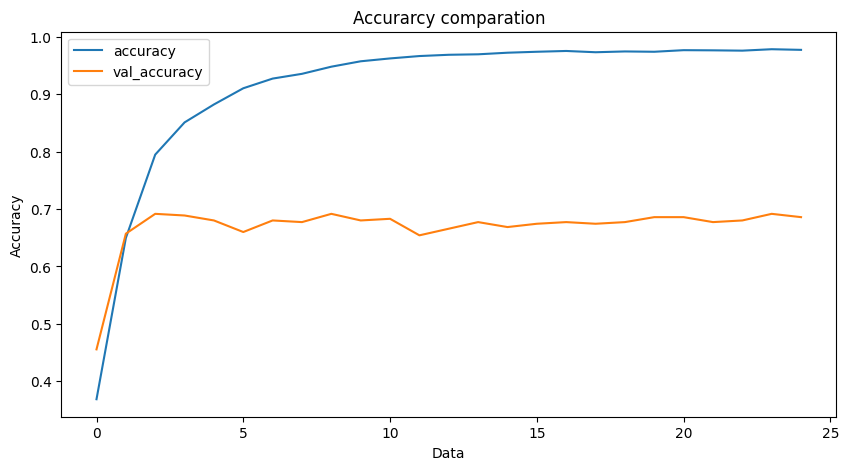

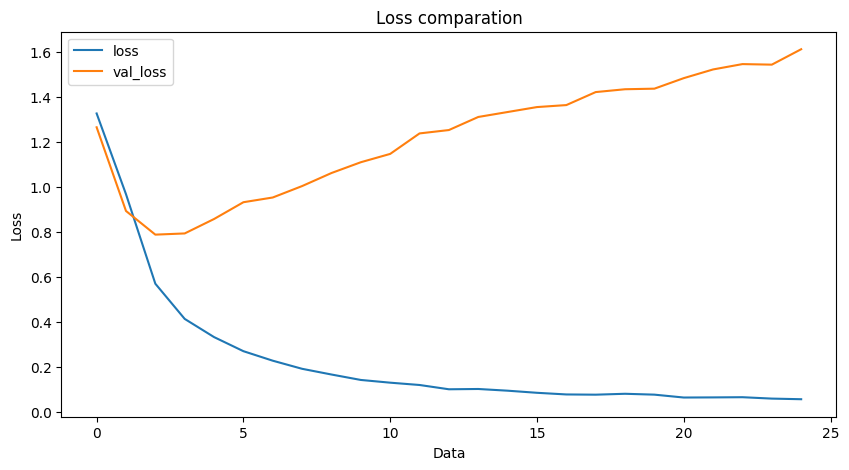

In [23]:
draw_chart_accuracy = training_log
draw_chart_loss = training_log
draw_chart_accuracy = draw_chart_accuracy.drop(columns='loss')
draw_chart_accuracy = draw_chart_accuracy.drop(columns='val_loss')
draw_chart_accuracy = draw_chart_accuracy.drop(columns='epoch')

draw_chart_loss = draw_chart_loss.drop(columns='accuracy')
draw_chart_loss = draw_chart_loss.drop(columns='val_accuracy')
draw_chart_loss = draw_chart_loss.drop(columns='epoch')

draw_chart_accuracy.plot(title='Accurarcy comparation',figsize=(10, 5),legend=True,xlabel='Data',ylabel='Accuracy')
draw_chart_loss.plot(title='Loss comparation',figsize=(10, 5),legend=True,xlabel='Data',ylabel='Loss')

#Interpret
"""
1.After reaching a certain stage, whether in training data or test data, accuracy cannot be improved.
2.After reaching a certain stage, whether in training data or test data, loss cannot be reduced.
3.Upon reaching a certain level, while the accuracy of the training data may increase, the accuracy of the test data will not improve.
4.Upon reaching a certain level, while the accuracy of the training data may increase, the loss of the test data will not reduce.
5.After a period of reduction, the loss in the test data has rebounded.
"""

#Class related
"""
This should be a phenomenon of overfitting because, initially, the loss decreased significantly in both the training and test data. 
However, as time progressed, the loss in the training data continued to decrease, indicating that this was not underfitting. 
Meanwhile, the loss in the test data did not decrease; instead, it exhibited a reverse rise, further confirming that this is overfitting.
"""

Exercise 7

In [45]:
"""
1. Averaging Word Embeddings: This approach involves taking the average of word embeddings within a sentence.
2. Summing Word Embeddings: This approach involves summing word embeddings into a sentence.

I take 1. for example.
"""
example_input_sentence = 'I feel happy'
sentence_vectors = np.array([np.mean([w2v_google_model[word] for word in example_input_sentence.split()], axis=0) for sentence in example_input_sentence])
print(type(sentence_vectors))
print(sentence_vectors)


<class 'numpy.ndarray'>
[[ 0.00763957  0.05628459 -0.00939178 ... -0.01322428  0.09952799
  -0.15820312]
 [ 0.00763957  0.05628459 -0.00939178 ... -0.01322428  0.09952799
  -0.15820312]
 [ 0.00763957  0.05628459 -0.00939178 ... -0.01322428  0.09952799
  -0.15820312]
 ...
 [ 0.00763957  0.05628459 -0.00939178 ... -0.01322428  0.09952799
  -0.15820312]
 [ 0.00763957  0.05628459 -0.00939178 ... -0.01322428  0.09952799
  -0.15820312]
 [ 0.00763957  0.05628459 -0.00939178 ... -0.01322428  0.09952799
  -0.15820312]]


Exercise 8

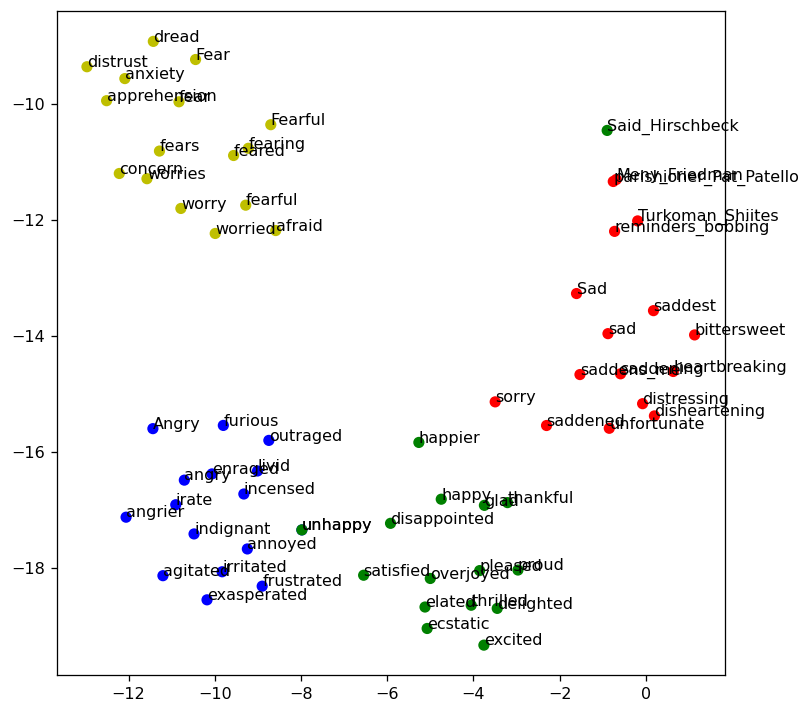

'\nSaid_Hirschbeck is "happy" cluster member, but it is far away from the mean of "happy" cluster. \nSo, Said_Hirschbeck may be considered as outlier.\nTo my opinion, this outlier can be removed directly.\n'

In [25]:
word_list2 = ['angry', 'happy', 'sad', 'fear']

topn2 = 15
angry_words_hw = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn2)]
happy_words_hw = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn2)]        
sad_words_hw = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn2)]        
fear_words_hw = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn2)]  

target_words2 = angry_words_hw + happy_words_hw + sad_words_hw + fear_words_hw

cn2 = topn2 + 1
color2 = ['b'] * cn2 + ['g'] * cn2 + ['r'] * cn2 + ['y'] * cn2

model2 = w2v_google_model

size = 200
target_size2 = len(target_words2)
all_word2 = list(model2.index_to_key)
word_train2 = target_words2 + all_word2[:size]
X_train2 = model2[word_train2]

tsne2 = TSNE(n_components=2, metric='cosine', random_state=28)

X_tsne2 = tsne2.fit_transform(X_train2)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne2[:target_size2, 0], X_tsne2[:target_size2, 1], c=color2)
for label, x, y in zip(target_words2, X_tsne2[:target_size2, 0], X_tsne2[:target_size2, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

#something strange:
"""
Said_Hirschbeck is "happy" cluster member, but it is far away from the mean of "happy" cluster. 
So, Said_Hirschbeck may be considered as outlier.
To my opinion, this outlier can be removed directly.
"""